In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [3]:
df = pd.read_excel("Store_1.xlsx", sheet_name="Store_1")
df = df[["Date", "Weekly_Sales"]]
df["Date"] = df["Date"].sort_values(ascending=True)
df

,Date,Weekly_Sales
0,2010-01-01,7378424
1,2010-02-01,6143220
2,2010-03-01,5897958
3,2010-04-01,9072019
4,2010-05-01,4354687
5,2010-06-01,6050269
6,2010-07-01,7323279
7,2010-08-01,5910575
8,2010-09-01,5873663
9,2010-10-01,7237762


1. Przekszałcam Date to DateTime
2. Nadaje index dla dat, aby można było zrobić wykres

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df

,Weekly_Sales
Date,
2010-01-01,7378424
2010-02-01,6143220
2010-03-01,5897958
2010-04-01,9072019
2010-05-01,4354687
2010-06-01,6050269
2010-07-01,7323279
2010-08-01,5910575
2010-09-01,5873663


1. Wizualizacja szeregów czasowych

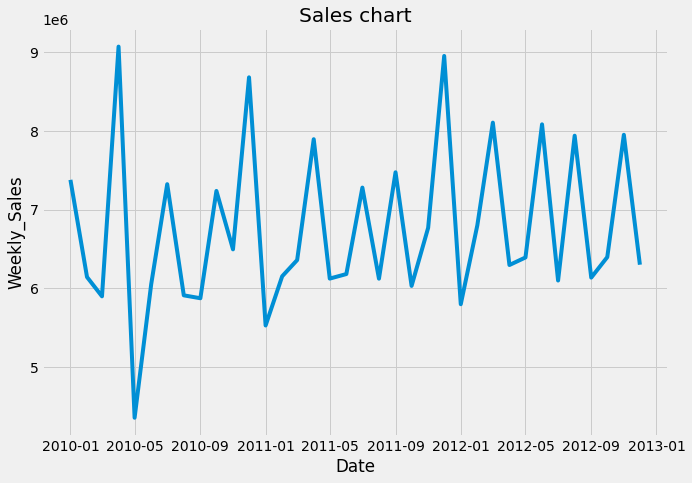

In [5]:
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Sales chart")
plt.plot(df)
pass

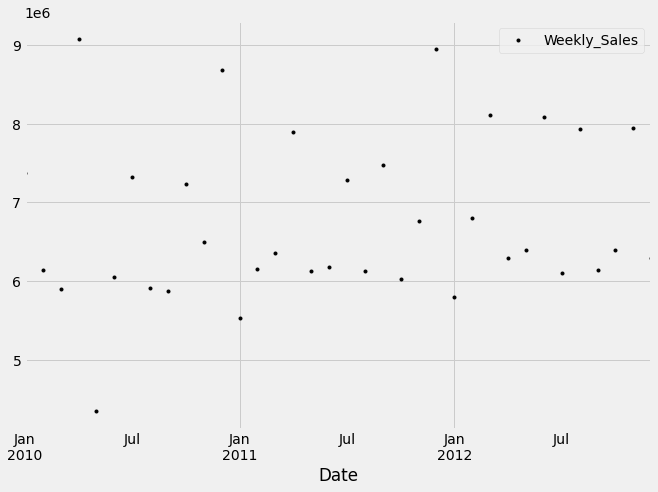

In [6]:
df.plot(style="k.")
plt.show()

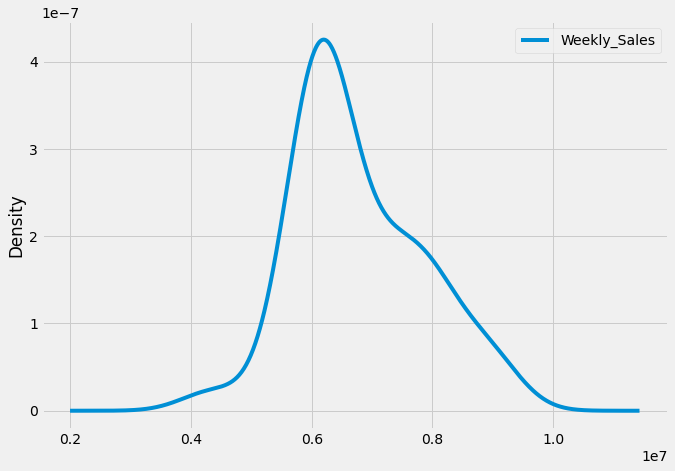

In [7]:
df.plot(kind="kde")
pass

1. Sprawdzam sezonowość
2. Sprawdzam trendy

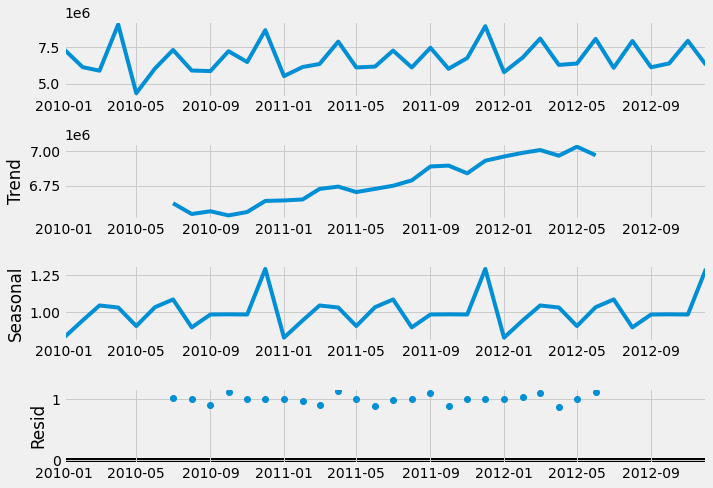

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model="multiplicative")
result.plot()
plt.show()

1. Poniższą funkcją sprawdzam czy nasze dane są "stacjonarne" (nie wiem czy to jest odpowiednie tłumaczenie, nigdzie nie mogę znaleźć niczego lepszego)
2. Do sprawdzenia wykorzystuje ADF TEST (Augmented Dickey-Fuller) 

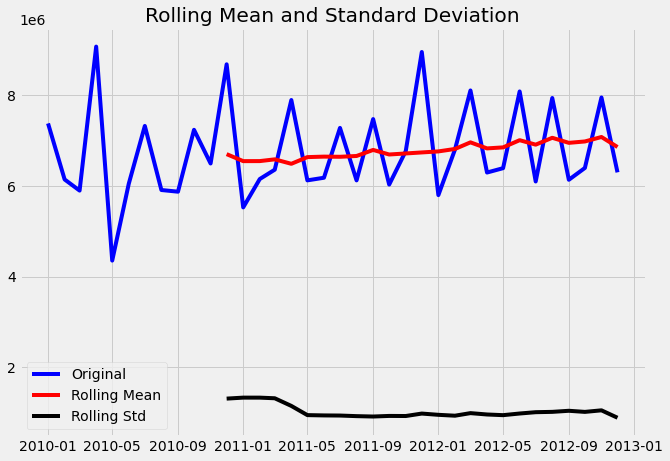

Results of dickey fuller test
Test Statistics               -7.291813e+00
p-value                        1.410788e-10
No. of lags used               1.000000e+00
Number of observations used    3.400000e+01
critical value (1%)           -3.639224e+00
critical value (5%)           -2.951230e+00
critical value (10%)          -2.614447e+00
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Weekly_Sales'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df)

Aby otrzymać dane "stacjonarne" należy wyeliminować trend oraz sezonowość.
Zaczynam od wykonania logarytmu szeregu w celu zmiejszenia wielkości wartości i zmniejszenia trendu wzrostowego w szeregu.

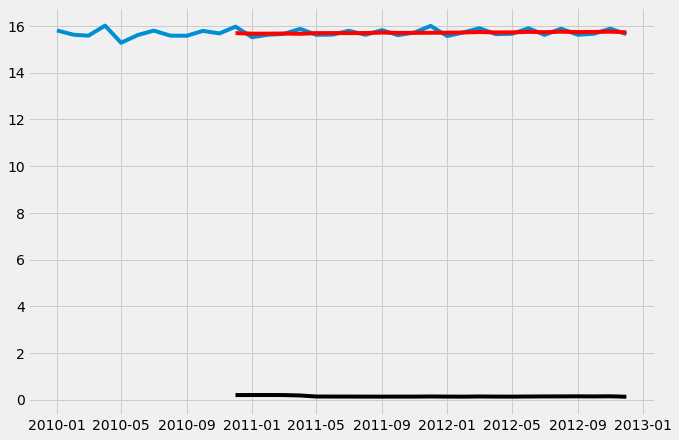

In [10]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

Po znalezieniu średniej, bierzemy różnicę między seriami oraz średnią z każdego punktu serii.
W ten sposób, eliminujemy trendy serii oraz sprawiamy, że nasze dane są bardziej stacjonarne.

In [11]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

Wykonyjemy ponownie ADF Test, aby sprawdzić czy nasze dane są stacjonarne czy nie.

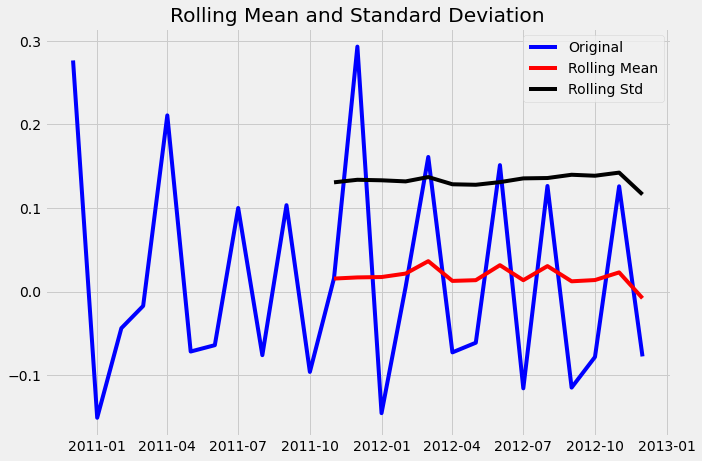

Results of dickey fuller test
Test Statistics               -7.245449e+00
p-value                        1.837389e-10
No. of lags used               1.000000e+00
Number of observations used    2.300000e+01
critical value (1%)           -3.752928e+00
critical value (5%)           -2.998500e+00
critical value (10%)          -2.638967e+00
dtype: float64


In [12]:
test_stationarity(df_log_moving_avg_diff)

Z powyższego wykresu oraz tabeli wynika, że nasze dane są danymi stacjonarnymi.
Teraz musimy sprawdzić średnią ważoną, aby zrozumieć trend w naszej naszej serii czasowej.

In [13]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

Powyższa formuła sprawia, że większą wagę mają ostatnie dane (Sales weekly) niż dane z bardziej odległej przeszłości.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


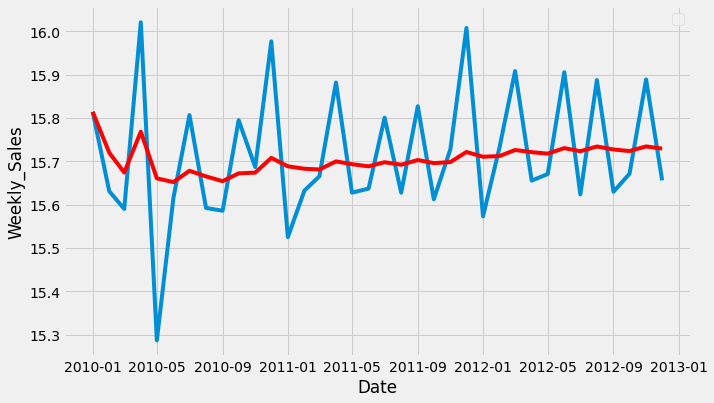

In [15]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show(block =False)
pass

Ponownie przeprowadzamy test ADF.

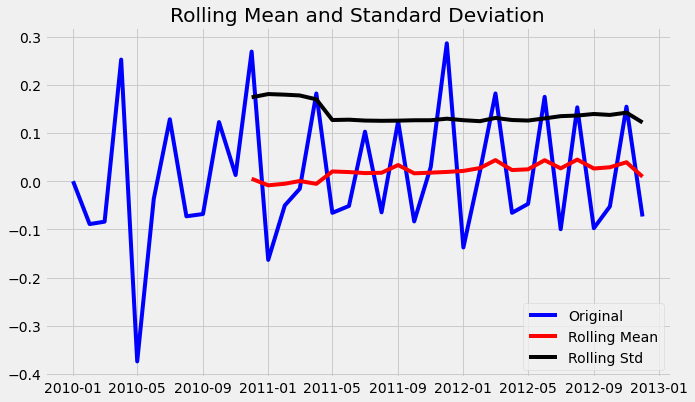

Results of dickey fuller test
Test Statistics                -3.238335
p-value                         0.017870
No. of lags used                6.000000
Number of observations used    29.000000
critical value (1%)            -3.679060
critical value (5%)            -2.967882
critical value (10%)           -2.623158
dtype: float64


In [16]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

Z powyższego wykresu zaobserwowaliśmy, że dane osiągnęły stacjonarność. Widzimy również, że statystyki testowe i wartość krytyczna są stosunkowo równe.

Mogą wystąpić przypadki, w których w danych występuje duża sezonowość. W takich przypadkach samo usunięcie trendu niewiele pomoże. Trzeba też zadbać o sezonowość serii danych. Jedną z takich metod tego zadania jest różnicowanie.

Różnicowanie to metoda przekształcania zbioru danych szeregów czasowych. Może służyć do usuwania zależności szeregowej od czasu, tzw. zależności czasowej. Obejmuje to struktury takie jak trendy i sezonowość. Różnicowanie może pomóc w ustabilizowaniu średniej szeregu czasowego poprzez usunięcie zmian w poziomie szeregu czasowego, a tym samym wyeliminowanie (lub zmniejszenie) trendu i sezonowości.

Różnicowanie polega na odjęciu poprzedniej obserwacji od bieżącej obserwacji.

Ponownie wykonajemy test Dickeya-Fullera (ADFT).

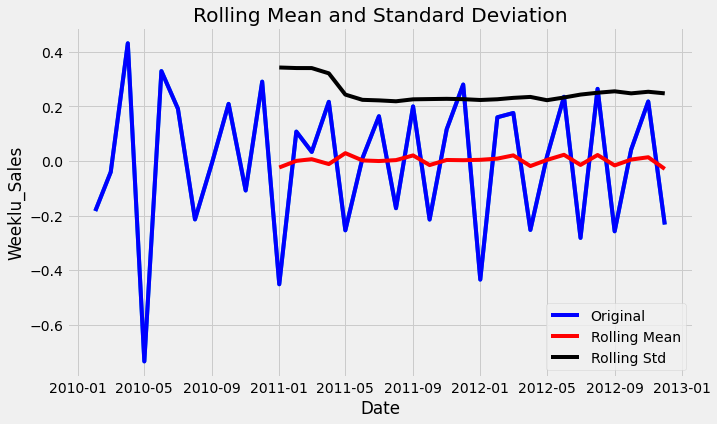

Results of dickey fuller test
Test Statistics                -5.431513
p-value                         0.000003
No. of lags used                4.000000
Number of observations used    30.000000
critical value (1%)            -3.669920
critical value (5%)            -2.964071
critical value (10%)           -2.621171
dtype: float64


In [17]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Weeklu_Sales")
plt.plot(df_log_diff)

#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

Następnym krokiem jest wykonanie dekompozycji, która zapewnia uporządkowany sposób myślenia o problemie związanym z prognozowaniem szeregów czasowych, zarówno ogólnie pod względem złożoności modelowania, jak i w szczególności pod kątem tego, jak najlepiej uchwycić każdy z tych składników w danym modelu.

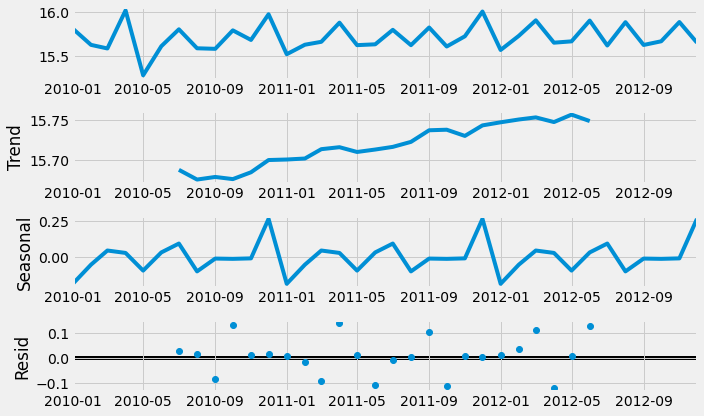

In [19]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive')
result.plot()
plt.show()

Na końcu ponownie wykonujemy test ADF

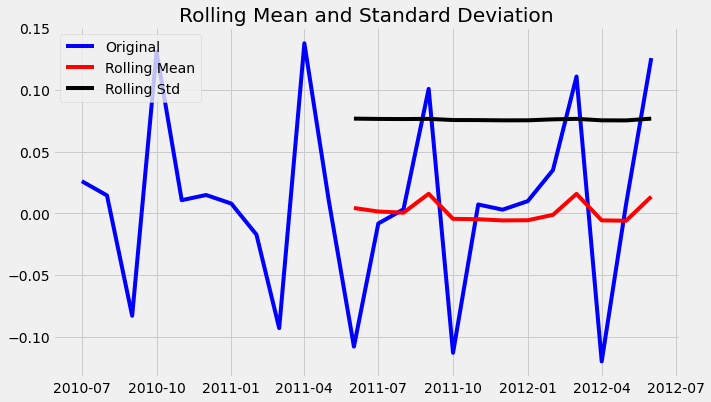

In [20]:
def test_stationarity_final(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)



trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity_final(residual)

Zanim przejdziemy do budowy naszego modelu prognostycznego, musimy określić optymalne parametry naszego modelu. Dla tych optymalnych parametrów potrzebujemy wykresów ACF i PACF.

Niesezonowy model ARIMA klasyfikowany jest jako model „ARIMA(p,d,q)”, gdzie:

p → Liczba wyrażeń autoregresyjnych, d → Liczba różnic niesezonowych potrzebnych do stacjonarności, oraz q → Liczba błędów prognozy opóźnionej w równaniu predykcji.

Wartości p i q przechodzą przez wykresy ACF i PACF. Rozumiemy więc zarówno ACF, jak i PACF!

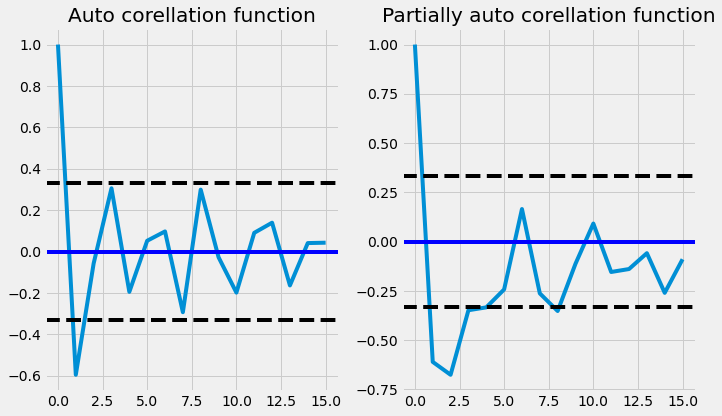

In [21]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

Aby znaleźć wartości p i q z powyższych wykresów, musimy sprawdzić, gdzie na wykresie jest punkt cut off lub spada do zera po raz pierwszy z powyższych wykresów, wartości p i q są zaledwie bliskie 3, gdzie wykres odcina początek (narysuj linię do osi x) teraz mamy wartości p,d,q. Więc teraz możemy podstawić w modelu ARIMA i zobaczmy wyjście.

In [34]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_log, order=(1,1,1))
result_AR = model.fit()

C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
from pandas.tseries.offsets import DateOffset

In [39]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [40]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)


In [42]:
future_df = pd.concat([df_log, future_datest_df])

<AxesSubplot:>

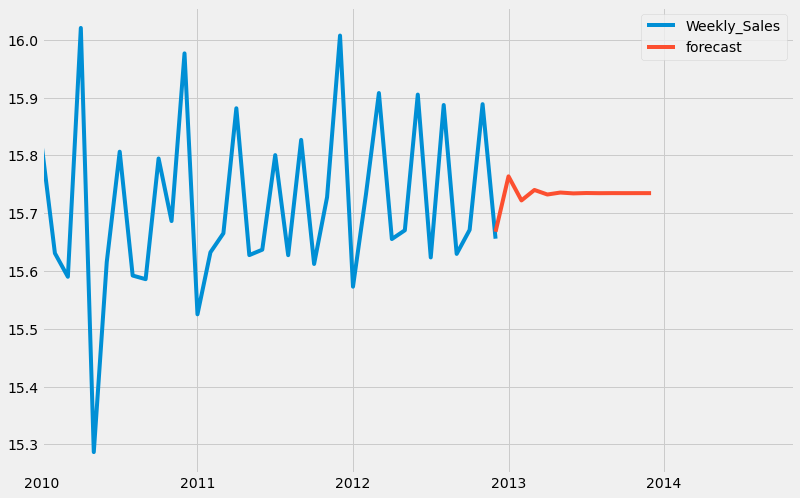

In [53]:
future_df["forecast"] = result_AR.predict(start=35, end=47, dynamic=True)
future_df[["Weekly_Sales", "forecast"]].plot(figsize=(12,8))

In [8]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 42

1. Podział na klastry
2. Posortowanie wartości

In [4]:
print("xgboost", xgb.__version__)

xgboost 1.6.1


In [32]:
df = pd.read_excel("Walmart_clusters.xlsx")


In [33]:
class_0 = df[df["cluster_sklearn"] == 0]
class_0 = class_0[["Date", "Weekly_Sales"]]

In [35]:
class_0["Date"] = pd.to_datetime(class_0["Date"])
class_0["Date"] = class_0["Date"].sort_values(ascending=True)
# class_1.set_index("Date", inplace=True)
# class_1


In [36]:
class_0.set_index("Date", inplace=True)

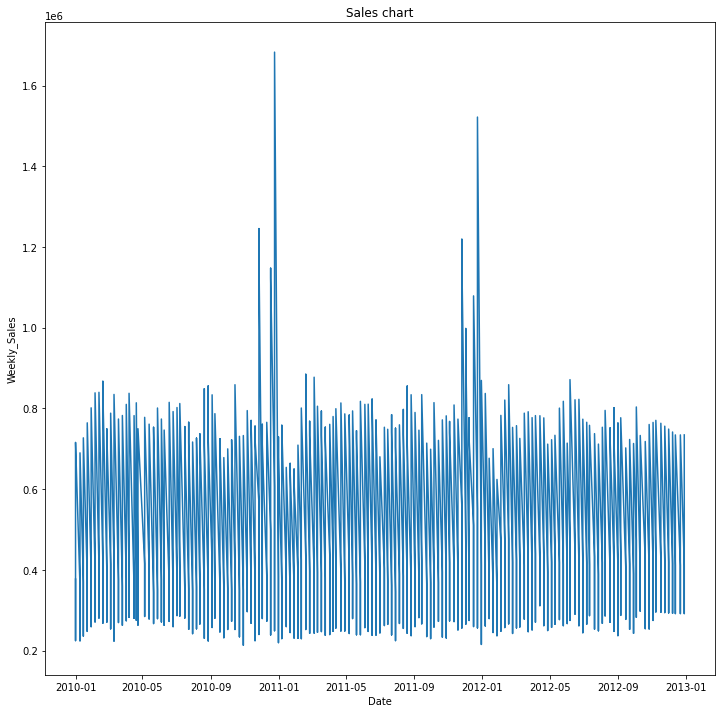

In [37]:
plt.figure(figsize=(12,12))
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Sales chart")
plt.plot(class_0)
pass

In [39]:
# ABY TEGO UŻYĆ MUSI BYĆ ZACHOWANA CIĄGŁOŚĆ DANYNCH DOTYCZĄCYCH DAT (BRAK PRZERW MIĘDZY DANYMI JAK U NAS)

# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(class_0, model="multiplicative")
# result.plot()
# plt.show()

>expected=653043.0, predicted=653025.2
>expected=697317.0, predicted=697289.4
>expected=513737.0, predicted=513719.9
>expected=434593.0, predicted=434606.9
>expected=291781.0, predicted=291735.2
>expected=300237.0, predicted=300227.2
>expected=521811.0, predicted=521804.8
>expected=437321.0, predicted=437318.1
>expected=612380.0, predicted=612381.8
>expected=619370.0, predicted=619364.9
>expected=337796.0, predicted=337806.9
>expected=734464.0, predicted=734454.8
MAE: 14.005


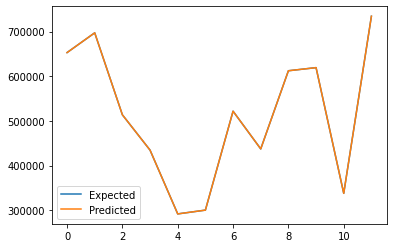

In [41]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = class_0
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [44]:
# # transform a time series dataset into a supervised learning dataset
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = DataFrame(data)
# 	cols = list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg.values
 
# # load the dataset
# series = class_0
# values = series.values
# # transform the time series data into supervised learning
# train = series_to_supervised(values, n_in=2821)
# # split into input and output columns
# trainX, trainy = train[:, :-1], train[:, -1]
# # fit model
# model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
# model.fit(trainX, trainy)
# # construct an input for a new preduction
# row = values[-6:].flatten()
# # make a one-step prediction
# yhat = model.predict(asarray([row]))
# print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

Kolejny model XGBoost - Kaggle
https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost/notebook

In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
plt.style.use('fivethirtyeight')

In [52]:
df = pd.read_excel("Walmart_clusters.xlsx")

In [53]:
df["Date"] = pd.to_datetime(df["Date"])
class_0 = df[df["cluster_sklearn"] == 0]

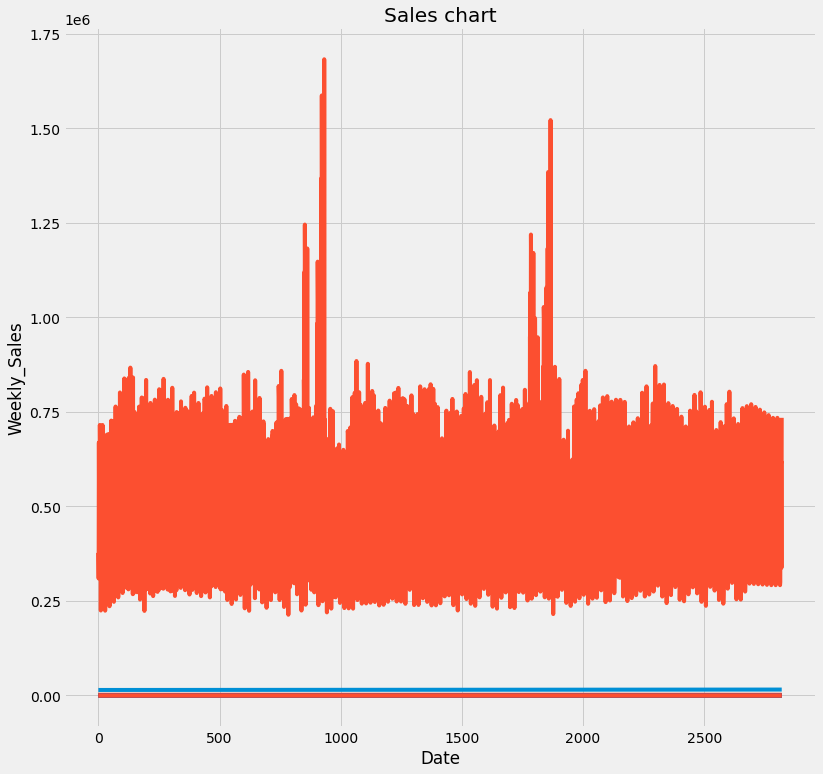

In [54]:
plt.figure(figsize=(12,12))
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Sales chart")
plt.plot(class_0)
pass

In [59]:
split_date = "2012-01-01"
train = class_0[class_0["Date"] <= split_date].copy()
test = class_0[class_0["Date"] > split_date].copy()

In [64]:
X_train, y_train = train.drop(columns=["Weekly_Sales", "Date"]), train["Weekly_Sales"]
X_test, y_test = test.drop(columns=["Weekly_Sales", "Date"]), test["Weekly_Sales"]

In [112]:
xgbreg = xgb.XGBRegressor(n_estimators=1000)
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

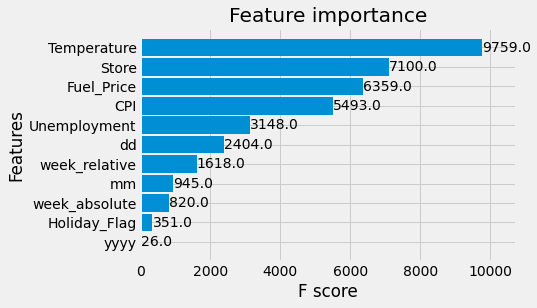

In [113]:
_ = plot_importance(xgbreg, height=0.9)

In [114]:
test['MW_Prediction'] = xgbreg.predict(X_test)
pjme_all = pd.concat([test, train], sort=False)

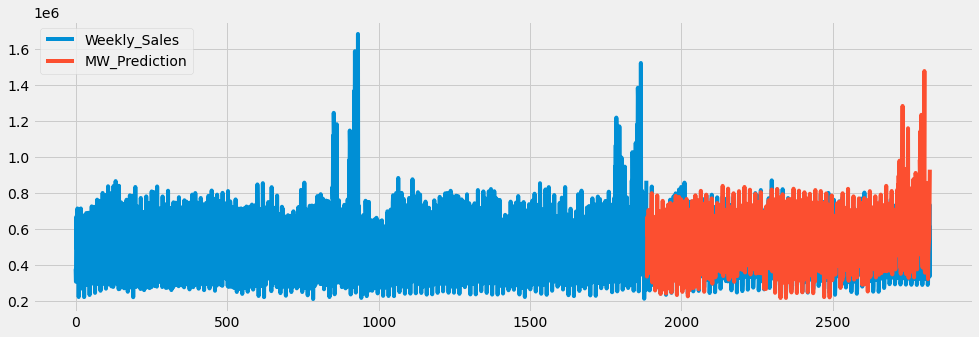

In [115]:
_ = pjme_all[['Weekly_Sales','MW_Prediction']].plot(figsize=(15, 5))

In [116]:
y_pred = xgbreg.predict(X_test)

In [117]:
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

MAPE:  0.15727782384137476


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error 

In [2]:
df = pd.read_excel("Walmart_clusters.xlsx")
class_0 = df[df["cluster_sklearn"] == 0]
class_0 = class_0.drop(columns=class_0[["Date", "cluster_sklearn"]], axis=1)

In [15]:
class_1 = df[df["cluster_sklearn"] == 1]
class_1 = class_1.drop(columns=class_1[["Date", "cluster_sklearn"]], axis=1)

In [16]:
class_2 = df[df["cluster_sklearn"] == 2]
class_2 = class_2.drop(columns=class_2[["Date", "cluster_sklearn"]], axis=1)

In [3]:
class_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 2820
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          2821 non-null   int64  
 1   Weekly_Sales   2821 non-null   int64  
 2   Holiday_Flag   2821 non-null   int64  
 3   Temperature    2821 non-null   float64
 4   Fuel_Price     2821 non-null   float64
 5   CPI            2821 non-null   float64
 6   Unemployment   2821 non-null   float64
 7   yyyy           2821 non-null   int64  
 8   mm             2821 non-null   int64  
 9   dd             2821 non-null   int64  
 10  week_relative  2821 non-null   int64  
 11  week_absolute  2821 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 286.5 KB


In [4]:
correlation_matrix = np.round(class_0.corr(),2)

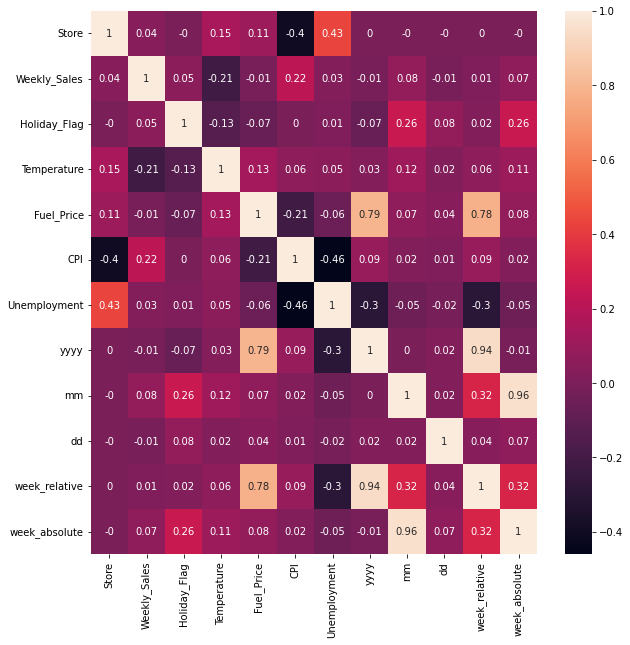

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
pass

In [6]:
X = class_0.drop(columns="Weekly_Sales", axis=1)
y = class_0["Weekly_Sales"]

In [17]:
X1 = class_1.drop(columns="Weekly_Sales", axis=1)
y1 = class_1["Weekly_Sales"]

In [18]:
X2 = class_2.drop(columns="Weekly_Sales", axis=1)
y2 = class_2["Weekly_Sales"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(y_train.shape)

(1974, 11)
(1974,)


In [21]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
reg1 = xgb.XGBRegressor()
reg1.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
reg2 = xgb.XGBRegressor()
reg2.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [24]:
y_pred = reg.predict(X_test)
y_pred1 = reg1.predict(X_test1)
y_pred2 = reg2.predict(X_test2)

print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test1, y_pred1))
print("MAPE: ", mean_absolute_percentage_error(y_test2, y_pred2))

MAPE:  0.04379148691826752
MAPE:  0.036813165559363495
MAPE:  0.04444100138547639


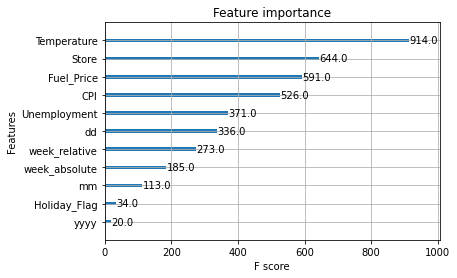

In [11]:
ft_importance = plot_importance(reg)

In [12]:
reg2 = xgb.XGBRegressor(booster="gblinear",
                        objective="reg:squarederror",
                        learning_rate=0.5,
                        n_estimators=1000)

reg2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [13]:
y_pred2 = reg2.predict(X_test)

print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred2))

MAPE:  0.25692535929756
